### Imports

In [86]:
import tensorflow as tf 
from keras.models import load_model
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import csv

import os

### Load model

In [75]:
interpreter = tf.lite.Interpreter(model_path="models/EffNetB0.tflite")

### Get Predictions

**Define File Path of Test Dataset**

In [76]:
file_path = "dataset-classification/test-segmented/"
file_out = "tmp/EffNetB0_preds.csv"

**Get Predictions of the TFLite Model**

In [ ]:
classes = os.listdir(file_path)
prediction_labels = ["-K", "-N", "FN"]

with open(rf'{file_out}', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Name", "Actual", "Predicted"])
    for class_folder in classes:
        images = os.listdir(os.path.join(file_path, class_folder))
        for img in images:
            interpreter.allocate_tensors()
            input_index = interpreter.get_input_details()[0]['index']
            output_index = interpreter.get_output_details()[0]['index']
            input_format = interpreter.get_output_details()[0]['dtype']

            test_image_path = os.path.join(file_path, class_folder, img)
            test_image = cv2.imread(test_image_path)
            test_image = np.expand_dims(test_image, axis=0).astype(input_format)
            interpreter.set_tensor(input_index, test_image)

            interpreter.invoke()
            output = interpreter.tensor(output_index)
            prediction = np.argmax(output())
            number = class_folder+'/'+img
            
            print("For:", number, "-", "Actual:", class_folder,"|", "Prediction:", prediction_labels[prediction])
            writer.writerow([number, class_folder, prediction_labels[prediction]])

### Evaluation of TFLite Models

**Import Predictions**

In [82]:
EffNetB0_pred = pd.read_csv("tmp/EffNetB0_preds.csv", index_col = [0])
MNetLarge_pred = pd.read_csv("tmp/MNetLarge_preds.csv", index_col = [0])
MNetSmall_pred =  pd.read_csv("tmp/MNetSmall_preds.csv", index_col = [0])

#### Confusion Matrices

In [131]:
confusion_EffNetB0 = pd.crosstab(EffNetB0_pred.Actual, EffNetB0_pred.Predicted)
confusion_MNetLarge = pd.crosstab(MNetLarge_pred.Actual, MNetLarge_pred.Predicted)
confusion_MNetSmall = pd.crosstab(MNetSmall_pred.Actual, MNetSmall_pred.Predicted)

**Confusion Matrix for EfficientNetB0 TFLite Model**

Text(0.5, 1.0, 'Confusion Matrix for EfficientNetB0 TFLite Model')

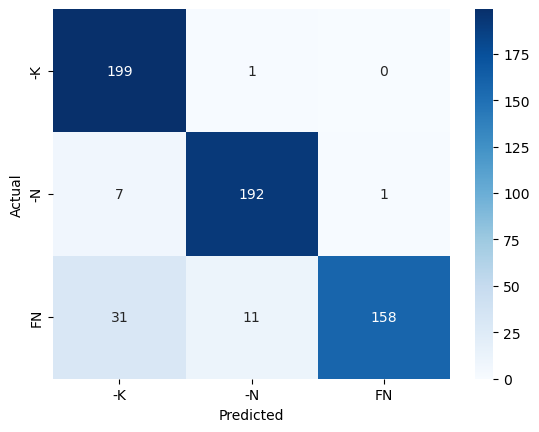

In [132]:
ax_EffNetB0 = sn.heatmap(confusion_EffNetB0, annot=True, cmap='Blues',fmt='g')
ax.set_title("Confusion Matrix for EfficientNetB0 TFLite Model")

**Confusion Matrix for MobileNetLarge TFLite Model**

Text(0.5, 1.0, 'Confusion Matrix for MobileNetV3Large TFLite Model')

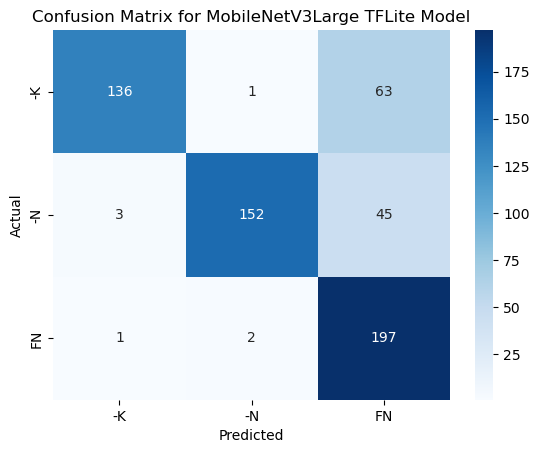

In [134]:
ax_MNetLarge = sn.heatmap(confusion_MNetLarge, annot=True, cmap='Blues',fmt='g')
ax_MNetLarge.set_title("Confusion Matrix for MobileNetV3Large TFLite Model")

**Confusion Matrix for MobileNetSmall TFLite Model**

Text(0.5, 1.0, 'Confusion Matrix for MobileNetV3Small TFLite Model')

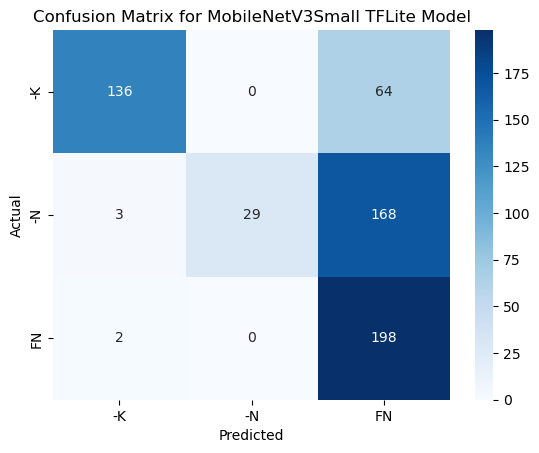

In [135]:
ax_MNetSmall = sn.heatmap(confusion_MNetSmall, annot=True, cmap='Blues',fmt='g')
ax_MNetSmall.set_title("Confusion Matrix for MobileNetV3Small TFLite Model")

#### Accuracy, Precision, F1-Score, and Recall of EfficientNetB0

In [137]:
confusion_EffNetB0 = pd.crosstab(EffNetB0_pred.Predicted, EffNetB0_pred.Actual)

**Getting the TP, FP, FN, and TN values**

In [138]:
TP = confusion_EffNetB0.iloc[0,0]
FP = confusion_EffNetB0.iloc[0,:].sum() - TP
FN = confusion_EffNetB0.iloc[:,0].sum() - TP
TN = confusion_EffNetB0.sum().sum() - TP - FP - FN

**Metrics**

In [139]:
Accuracy = (TP+TN)/confusion_EffNetB0.sum().sum()
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = (2*Precision*Recall) / (Precision+Recall)

print("EfficientNetB0 Accuracy:", Accuracy)
print("EfficientNetB0 Precision:", Precision)
print("EfficientNetB0 Recall:", Recall)
print("EfficientNetB0 F1_Score:", F1_Score)

EfficientNetB0 Accuracy: 0.935
EfficientNetB0 Precision: 0.8396624472573839
EfficientNetB0 Recall: 0.995
EfficientNetB0 F1_Score: 0.9107551487414187


#### Accuracy, Precision, F1-Score, and Recall of MobileNetV3Large

In [144]:
confusion_MNetLarge = pd.crosstab(MNetLarge_pred.Predicted, MNetLarge_pred.Actual)

**Getting the TP, FP, FN, and TN values**

In [145]:
TP = confusion_MNetLarge.iloc[0,0]
FP = confusion_MNetLarge.iloc[0,:].sum() - TP
FN = confusion_MNetLarge.iloc[:,0].sum() - TP
TN = confusion_MNetLarge.sum().sum() - TP - FP - FN

**Metrics**

In [146]:
Accuracy = (TP+TN)/confusion_MNetLarge.sum().sum()
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = (2*Precision*Recall) / (Precision+Recall)

print("MNetV3Large Accuracy:", Accuracy)
print("MNetV3Large Precision:", Precision)
print("MNetV3Large Recall:", Recall)
print("MNetV3Large F1_Score:", F1_Score)

MNetV3Large Accuracy: 0.8866666666666667
MNetV3Large Precision: 0.9714285714285714
MNetV3Large Recall: 0.68
MNetV3Large F1_Score: 0.8


#### Accuracy, Precision, F1-Score, and Recall of MobileNetV3Small

In [147]:
confusion_MNetSmall = pd.crosstab(MNetSmall_pred.Predicted, MNetSmall_pred.Actual)

**Getting the TP, FP, FN, and TN values**

In [148]:
TP = confusion_MNetSmall.iloc[0,0]
FP = confusion_MNetSmall.iloc[0,:].sum() - TP
FN = confusion_MNetSmall.iloc[:,0].sum() - TP
TN = confusion_MNetSmall.sum().sum() - TP - FP - FN

**Metrics**

In [149]:
Accuracy = (TP+TN)/confusion_MNetSmall.sum().sum()
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = (2*Precision*Recall) / (Precision+Recall)

print("MNetV3Small Accuracy:", Accuracy)
print("MNetV3Small Precision:", Precision)
print("MNetV3Small Recall:", Recall)
print("MNetV3Small F1_Score:", F1_Score)

MNetV3Small Accuracy: 0.885
MNetV3Small Precision: 0.9645390070921985
MNetV3Small Recall: 0.68
MNetV3Small F1_Score: 0.7976539589442816
